# Introducing Stacasso (Notebook)

v.0.0.1

Stacasso is a Python library for visualizing quantum computing circuits.

The main repository resides on [GitHub](https://github.com/JonHub/stacasso).  The documentation (contained in the repository) can also be viewed online

* [Stacasso README](https://jonhub.github.io/stacasso/)

* **[Introducing Stacasso (Notebook)](https://jonhub.github.io/stacasso/code/stacasso_introduction.html)** (this file) (Introduction and Users's Guide, with Examples)

The Stacasso library is used to pretty-print quantum circuits, as well as visualize the resulting quantum computation.  This notebook demonstrates how to use Stacasso, and visualize a several different quantum computation circuits.

Stacasso is an add-on to the google [Cirq](https://quantumai.google/cirq) quantum computing library.  Cirq is used to create and simulate circuits and for additional back-end code.

For more information on using Cirq, see

* [Introduction to Cirq](https://quantumai.google/cirq/tutorials/educators/intro)

* [Cirq basics](https://quantumai.google/cirq/tutorials/basics)

Stacasso is opensource and free, licensed under Apache 2.0.  Note that Stacasso also uses code from Cirq, used here under the terms of their license (also Apace 2.0).

##### Setup and Imports

In [1]:
# check to see if cirq is installed,
# and install with pip if not

try:
    import cirq
    print("imported cirq (already installed)")
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

imported cirq (already installed)


In [2]:
# standard set of includes

import matplotlib.pyplot as plt
import time

import numpy as np
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=6)

%config InlineBackend.figure_formats = ['svg']

#import seaborn
# seaborn.set()


In [3]:
# import the Stacasso functions
import stacasso as so
import hlf
import tele


### Visualizing Amplitudes and Probabilites

Creates a `test_state` out of two qubits.  The state is a superposition, each in a different phase, to demonstrate visual represnting probability amplitudes and phases.

One of the contral notions in quantum computation is the notion that you are not computing with classical *probability*, which is a real number between zero and one.  (Classically, an event can be said to occur with a chance between 0 and 100%.)

In quantum theory, the state of a system is described not be classical *probabilies*, but by complex *amplitudes*.  Amplitudes have a *magitude* between zero (no chance) and one (certainty), but additionally have *phase* information, which is discarded in classical probability, but becomes an important tool in quantum computation.

Moreover, the gates in quantum computing operate on these complex amplitudes, rather than probabilities.  

The classical *probability* is the square of the *amplitude*

Amplitudes are described by a *magnitude* between zero and one Like probabilies, amplitudes can have a *magnitude* between zero (no chance) and one (a certainty).

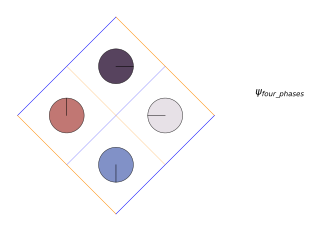

In [4]:

test_state = np.array([1, 1j, -1, -1j])
test_state = so.normalize_state(test_state)

so.draw_statevector4(test_state )

# add text label
plt.text(4, .6, '$\psi_{four\_phases}$')

#so.pprint_circuit('', 'Two Qubit State Space (Same Probabilty, Different Phases)')

plt.show()


### Quantum Random Number Generator

A hadamard transformation put the bit into an equal superpositon of two states.

Upon measument, it will collapse to one of two states ("quantum coin flip")

In [5]:
rng_circuit = cirq.Circuit()

q0 = cirq.NamedQubit('qubit 0')

rng_circuit.append(cirq.H(q0))
rng_circuit.append(cirq.measure(q0))


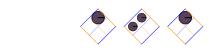

In [6]:
# display rng
# display bell

plt.figure(figsize=[3.7, 10])
plt.plot(0, 0)  # keeps the plot from shifting

rng_states = so.make_state_list(rng_circuit)

#so.pprint_circuit(rng_circuit, )

so.pprint( rng_circuit, '"Quantum Random Number Generator (QRNG)"' )

# iterate over the steps (states)
for s in range(len(rng_states)):
    state = rng_states[s]
    state = np.append( state, np.zeros(2))
    # draw as a two qubit circuit (second qubit is always zero)
    #np.state.append(np.zeros(2))
    so.draw_statevector4(state, [13+s*7, 0])
    #so.draw_state(state, [s*10,0] )

plt.show()


### Bell State

Bell States are made from maximially entangling two photons.  It is one of the most fundamental quantum mechanical circuits.

In [7]:
# Bell Example, without pretty-print

bell_circuit = so.make_bell_circuit(0, 0)


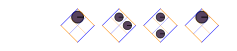

In [8]:
# display bell

plt.figure(figsize=[4, 10])
plt.plot(0, 0)  # keeps the plot from shifting

bell_states = so.make_state_list(bell_circuit)

so.pprint(bell_circuit, 'Bell State')
#so.pprint_circuit(bell_circuit, 'Bell State')

# iterate over the steps (states)
for s in range(len(bell_states)):
    state = bell_states[s]
    so.draw_statevector4(state, [10+s*7, 0])
    #so.draw_state(state, [s*10,0] )

plt.show()

# label Psi_0, Psi_Bell, Psi_M

### Quantum Teleportation

[Textbook algorithms in Cirq (Quantum Teleportation)](https://quantumai.google/cirq/tutorials/educators/textbook_algorithms#quantum_teleportation)



In [9]:
# quantum teleportation
import tele

#tele.test()


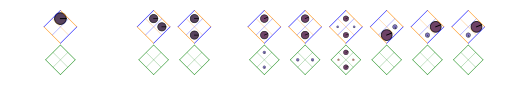

0.30887293815612793


In [10]:
"""Visualize the teleportation circuit."""
# Gate to put the message qubit in some state to send.
gate = cirq.X ** 0.25

# Create the teleportation circuit.
tele_circuit = tele.make_quantum_teleportation_circuit(gate)
#print("Teleportation circuit:\n")
#so.pprint_circuit(tele_circuit, 'Teleportation Circuit')
so.pprint(tele_circuit, 'Teleportation Circuit')

"""Display the Bloch vector of the message qubit."""
message = cirq.Circuit(gate.on(cirq.NamedQubit("Message"))).final_state_vector()
message_bloch_vector = cirq.bloch_vector_from_state_vector(message, index=0)
# print("Bloch vector of message qubit:")
# print(np.round(message_bloch_vector, 3),"\n")

"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# # Get a simulator.
# sim = cirq.Simulator()

# # Simulate the teleportation circuit.
# result = sim.simulate(circuit)

#states = so.make_state_list(tele_circuit)

# make the state list manually
circuit = tele_circuit
states = []
simulator = cirq.Simulator()
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    states.append(step.state_vector())

include_initial_state = True
if include_initial_state:
    initial_state = states[0]*0  # create a blank vector
    initial_state[0] = 1
    states = [initial_state] + states


# # Get the Bloch vector of Bob's qubit.
# bobs_bloch_vector = cirq.bloch_vector_from_state_vector(result.final_state_vector, index=1)
# print("Bloch vector of Bob's qubit:")
# print(np.round(bobs_bloch_vector, 3))

# # Verify they are the same state!
# np.testing.assert_allclose(bobs_bloch_vector, message_bloch_vector, atol=1e-7)

plt.figure(figsize=[len(states)*1, 100])

start_time = time.time()

# iterate over the steps (states)
# for s in range(len(states)):
#     state = states[s]
#     so.draw_statevector8(state, [5+s*7,0])
#     #so.draw_state(state, [s*10,0] )

so.draw_statevector8(states[0], [5, 0])
so.draw_statevector8(states[1], [21, 0])
so.draw_statevector8(states[2], [28, 0])

so.draw_statevector8(states[3], [40, 0])
so.draw_statevector8(states[4], [47, 0])
so.draw_statevector8(states[5], [54, 0])
so.draw_statevector8(states[6], [61, 0])
so.draw_statevector8(states[7], [68, 0])
so.draw_statevector8(states[8], [75, 0])

plt.plot(0, 0)  # keeps the plot from shifting
plt.show()
elapsed_time = time.time() - start_time
print(elapsed_time)


In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

# for line in range(5):
#     for num in range(70):
#         print(f" {num}", end="")
#     print()
#IPython.notebook.get_selected_cell().class_config.set('cm_config',{'lineWrapping':true}) // or false

so.pprint( tele_circuit)

### HLF 2D

[Hidden linear function problem](https://quantumai.google/cirq/tutorials/hidden_linear_function)

In [12]:
# Create smaller version of the HLF2D problem (3, 4 and 5 qubits)
#   q is number of qubits,
#   l is min_L_size
#
# Every HLD2D problem has zero as an answer (???),
# and can have additional answers
# interesting versions of the problem have only a few answers

# three qubits
q = 3
l = 4

# four qubits
# q = 4
# l = 5

# five qubits
# q = 5
# l = 12

# ten qubits (number from original google code)
#q = 10
#l = 4

print('Creating an HLF 2D problem instance with')
print('  ', q, 'qubits', '\n  ', l, 'min size of L subspace\n')

problem = None
while problem is None:
    print('finding interesting problem ... ', end='')
    problem = hlf.find_interesting_problem(q, l)
    if problem is None:
        print('(not found)')
    else:
        print('done!')

# the original google code uses 10 qbits

print("Size of subspace L:", len(problem.L))
print("Number of solutions: %d" % len(problem.all_zs))

hlf_circuit = hlf.generate_circuit_for_problem(problem)

#so.pprint_circuit( hlf_circuit, 'HLF 2D' )


Creating an HLF 2D problem instance with
   3 qubits 
   4 min size of L subspace

finding interesting problem ... done!
Size of subspace L: 4
Number of solutions: 2


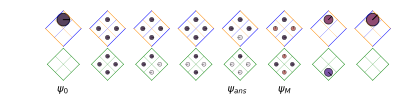

execution time: 0.49


In [16]:
# pretty-print the circuit, and draw the state-space

start_time = time.time()

# simulate the circuit
hlf_states = so.make_state_list(hlf_circuit)

# pretty print
so.pprint(hlf_circuit, 'Hidden Linear Function (HLF 2D)', indent=4)

# draw the state-space
plt.figure(figsize=[len(hlf_states)*.9, 5])

# iterate over the steps (states)
for s in range(len(hlf_states)):
    state = hlf_states[s]
    so.draw_statevector8(state, [6+s*7, 0])

# fix spacing on these
plt.text(5, -10, '$\psi_0$')
plt.text(32, -10, '$\psi_{ans}$')
plt.text(40, -10, '$\psi_M$')

plt.plot(0, 0)
plt.show()
elapsed_time = time.time() - start_time
print('execution time:', np.round(elapsed_time,  2))


In [14]:
# KEEP - this is the regex to find any number
# (will want to syntax highlight numbers at some point ...)

import re

K = '*'
# https://docs.python.org/3/howto/regex.html
regex_any_number = '-?(\d*\.)?\d+'

test_str = 'numbers 1 to 90 plus 5 minus -2 and 3.14 or -9.9'

print('original: ' + str(test_str))

# replace x with y in str
res = re.sub(regex_any_number, K, test_str)
          
print('replaced: ' + str(res))

original: numbers 1 to 90 plus 5 minus -2 and 3.14 or -9.9
replaced: numbers * to * plus * minus * and * or *


In [15]:
#txt = '<pre> some text </pre>'
txt = '<span style="white-space:pre;">' + \
      'some textaoeusthoenaoeuhntaouaouaoesnuthaosnetuhsanoehusnaotheusnahoeunhaoenuthaonsteuhsnaotheusnaotehusnaoheusnaohunsaoheushoaeunhanoteuhsnatousnaousnhaosunaseontuh' + \
       '</style>'

#white-space:pre
display(HTML(txt))